
### ANÁLISE ECONOMÉTRICA DO IMPACTO DA OFERTA DE ENERGIA ELÉTRICA E PETRÓLEO NA INFLAÇÃO NO BRASIL

#### 1. Introdução
A inflação é um fenômeno econômico que afeta diretamente o poder de compra da população e a estabilidade econômica de um país. No Brasil, a inflação tem sido uma preocupação constante, com variações significativas ao longo dos anos. Neste contexto, a oferta de energia elétrica e petróleo desempenha um papel crucial na formação dos preços, uma vez que esses insumos são fundamentais para a produção e o consumo de bens e serviços.
Neste trabalho, buscamos analisar o impacto da oferta de energia elétrica e petróleo na inflação no Brasil, utilizando dados mensais de 2000 a 2023. A análise será realizada por meio de modelos econométricos, com o objetivo de identificar a relação entre essas variáveis e a inflação, bem como avaliar a magnitude e a significância desse impacto.


#### 2. Metodologia

A metodologia adotada para a análise do impacto da oferta de energia elétrica (`ear`) e do petróleo (`oleo_bruto`) sobre os preços administrados da inflação brasileira (`ipca_admin`) segue uma abordagem baseada em séries temporais mensais no período de 2000 a 2023, estruturada nas seguintes etapas:

1. **Coleta de Dados**  
   As séries temporais mensais de `ipca_admin`, `ear` e `oleo_bruto` serão coletadas a partir de fontes oficiais, cobrindo o período de janeiro de 2000 a dezembro de 2023.

2. **Análise Gráfica Exploratória**  
   As três variáveis serão visualizadas graficamente para identificar padrões de tendência, sazonalidade, possíveis rupturas estruturais e presença de outliers. Serão utilizados histogramas, boxplots, QQ-plots, gráficos de densidade e violinos para apoiar essa caracterização.

3. **Testes de Estacionariedade**  
   Serão aplicados testes de estacionariedade, em especial o **Teste de Dickey-Fuller Aumentado (ADF)**, para verificar se as séries possuem média e variância constantes ao longo do tempo. Em caso negativo, serão aplicadas transformações como a **diferenciação**, com o objetivo de torná-las estacionárias, requisito necessário para a modelagem econométrica.

4. **Avaliação de Defasagens e Correlações Temporais**  
   A relação temporal entre as variáveis será analisada por meio de **correlação cruzada** (Cross-Correlation Function – CCF), a fim de identificar **defasagens significativas** entre as variáveis explicativas (`ear`, `oleo_bruto`) e a variável explicada (`ipca_admin`).

5. **Modelagem Econométrica com Séries Temporais**  
   Serão estimados modelos econométricos apropriados para séries temporais, como:
   - **ARIMAX**: quando `ipca_admin` é modelado em função de suas próprias defasagens e variáveis exógenas;
   - **VAR**: quando há interdependência dinâmica entre todas as variáveis.  
   
   A escolha do modelo será guiada por critérios como AIC, BIC, e pela significância estatística dos coeficientes.

6. **Avaliação do Modelo e Validação Fora da Amostra**  
   A qualidade dos modelos será avaliada por meio da análise dos resíduos (autocorrelação, normalidade, homocedasticidade) e por métricas como RMSE e MAE. Será também realizada validação fora da amostra, comparando previsões com dados reais em um período reservado.

7. **Análise de Causalidade**  
   Será conduzido o **Teste de Causalidade de Granger** para avaliar se `ear` e `oleo_bruto` possuem poder preditivo sobre `ipca_admin`, reforçando as evidências da relação dinâmica entre essas variáveis.

8. **Discussão e Conclusões**  
   Os resultados obtidos serão interpretados à luz da teoria econômica e da conjuntura brasileira. Serão discutidas as implicações para políticas públicas e sugestões para estudos futuros.


#### 3. Coleta de Dados
Os dados utilizados na análise foram coletados de fontes oficiais, como o Instituto Brasileiro de Geografia e Estatística (IBGE), ONS  - Operador Nacional do Sistema Elétrico e ANP -  Agência Nacional do Petróleo, Gás Natural e Biocombustíveis. As variáveis consideradas foram:
- Inflação (IPCA): 	Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Administrados, utilizado como medida da inflação no Brasil.
- Energia Elétrica armazenada: Capacidade de armazenamento de energia das bacias/reservatórios de todos os reservatórios cheios.
- Oferta de Óleo Bruto: Produção de petróleo no Brasil, medida em mil barris por dia.

##### 4. Análise Descritiva
A análise descritiva das variáveis foi realizada com o objetivo de identificar tendências, sazonalidades e possíveis outliers. A seguir, apresentamos gráficos e estatísticas descritivas das variáveis consideradas na análise.
```python

### 4.1 Análise de Distribuição das Variáveis

Vamos analisar a distribuição de cada variável do dataset para compreender melhor suas características.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Configurações para melhorar a visualização dos gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('Set2')
sns.set_context('talk')

In [2]:
df  = pd.read_parquet('dados.parquet')

In [3]:
df.head(5) 
df.tail(5)

,data,ear,u.m_ear,oleo_bruto,u.m_oleo,ipca_admin,u.m_ipca
295,2024-08-01,61.476806,percentual,3340,Barris/dia (mil),-0.12,percentual
296,2024-09-01,50.736338,percentual,3470,Barris/dia (mil),1.01,percentual
297,2024-10-01,47.900840,percentual,3269,Barris/dia (mil),0.71,percentual
298,2024-11-01,48.537575,percentual,3310,Barris/dia (mil),-0.87,percentual
299,2024-12-01,52.692861,percentual,3419,Barris/dia (mil),-0.17,percentual


In [4]:
# Verificar informações básicas do DataFrame
print("Informações do DataFrame:")
print(f"Shape: {df.shape}")
print("\nInformações das colunas:")
df.info()

Informações do DataFrame:
Shape: (300, 7)

Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        300 non-null    datetime64[ns]
 1   ear         300 non-null    float64       
 2   u.m_ear     300 non-null    object        
 3   oleo_bruto  300 non-null    int64         
 4   u.m_oleo    300 non-null    object        
 5   ipca_admin  300 non-null    float64       
 6   u.m_ipca    300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 16.5+ KB


In [5]:
# Estatísticas descritivas do DataFrame
print("Estatísticas descritivas:")
display(df.describe(exclude=['datetime64[ns]', 'object']).T)

Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max
ear,300.0,60.751847,13.644838,30.028935,50.560811,60.566563,71.783052,87.47971
oleo_bruto,300.0,2195.160000,631.169277,1121.000000,1695.000000,2077.500000,2636.500000,3678.00000
ipca_admin,300.0,0.568800,0.867214,-4.350000,0.177500,0.405000,0.882500,4.29000


In [6]:
# Lista todas as colunas no DataFrame exceto a data (se houver)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exibir a lista de variáveis que serão analisadas
print(f"Variáveis numéricas disponíveis para análise: {numeric_columns}")

Variáveis numéricas disponíveis para análise: ['ear', 'oleo_bruto', 'ipca_admin']


In [7]:
def plot_variable_distribution(dataframe, variable):
    """
    Função para criar múltiplos gráficos de distribuição para uma variável
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Análise de Distribuição: {variable}', fontsize=16)
    
    # Histograma com curva de densidade
    sns.histplot(dataframe[variable], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Histograma com Curva de Densidade')
    axes[0, 0].set_xlabel(variable)
    axes[0, 0].grid(True)
    
    # Boxplot
    sns.boxplot(y=dataframe[variable], ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot')
    axes[0, 1].set_ylabel(variable)
    axes[0, 1].grid(True)
    
    # QQ Plot para verificar normalidade
    from scipy import stats
    qq = stats.probplot(dataframe[variable].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('QQ Plot (Verificação de Normalidade)')
    axes[1, 0].grid(True)
    
    # Gráfico de violino
    sns.violinplot(y=dataframe[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Violin Plot')
    axes[1, 1].set_ylabel(variable)
    axes[1, 1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Estatísticas descritivas específicas da variável
    print(f"\nEstatísticas descritivas para {variable}:")
    stats_df = pd.DataFrame({
        'Média': [dataframe[variable].mean()],
        'Mediana': [dataframe[variable].median()],
        'Desvio Padrão': [dataframe[variable].std()],
        'Variância': [dataframe[variable].var()],
        'Mínimo': [dataframe[variable].min()],
        'Máximo': [dataframe[variable].max()],
        'Assimetria': [dataframe[variable].skew()],
        'Curtose': [dataframe[variable].kurtosis()]
    })
    display(stats_df.T)
    
    # Verificar normalidade com teste estatístico
    print(f"\nTeste de Normalidade (Shapiro-Wilk) para {variable}:")
    shapiro_test = stats.shapiro(dataframe[variable].dropna())
    print(f"Estatística de teste: {shapiro_test[0]:.4f}")
    print(f"Valor p: {shapiro_test[1]:.4f}")
    if shapiro_test[1] < 0.05:
        print("Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).")
    else:
        print("Conclusão: A distribuição pode ser considerada normal (não rejeita hipótese nula).")


Análise de Distribuição para: ear


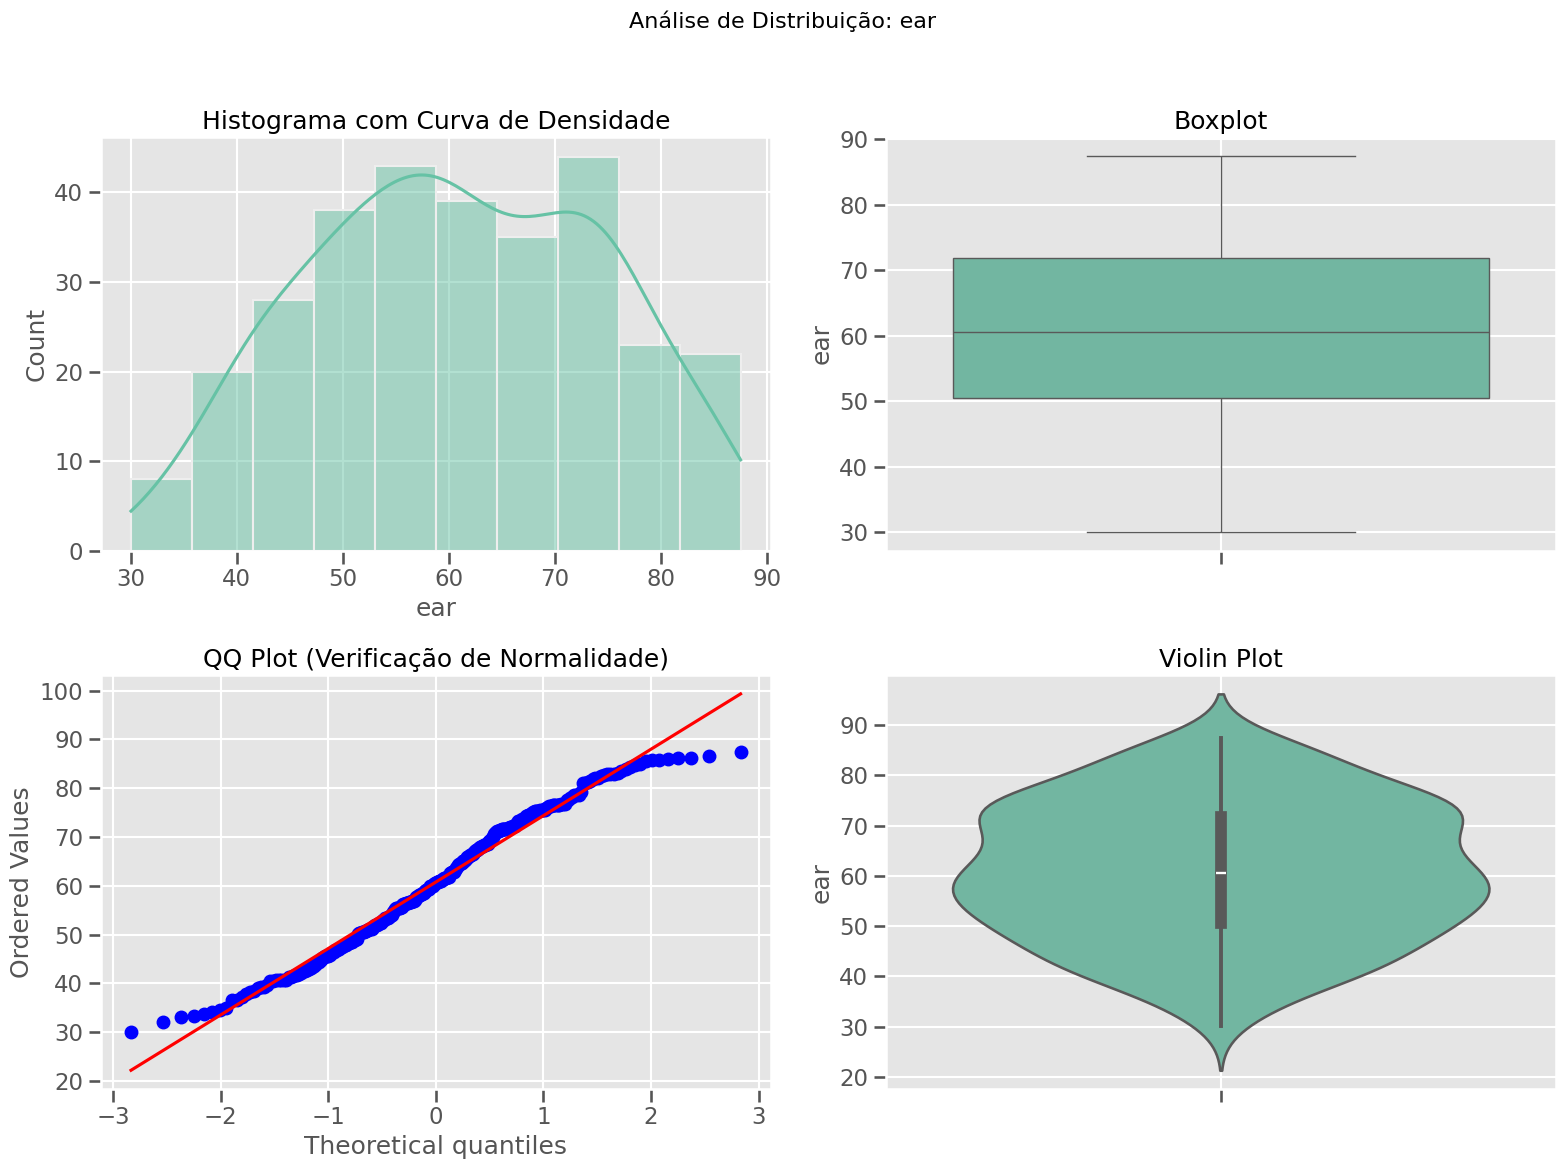


Estatísticas descritivas para ear:


,0
Média,60.751847
Mediana,60.566563
Desvio Padrão,13.644838
Variância,186.181591
Mínimo,30.028935
Máximo,87.479710
Assimetria,-0.039185
Curtose,-0.877915



Teste de Normalidade (Shapiro-Wilk) para ear:
Estatística de teste: 0.9806
Valor p: 0.0004
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: oleo_bruto


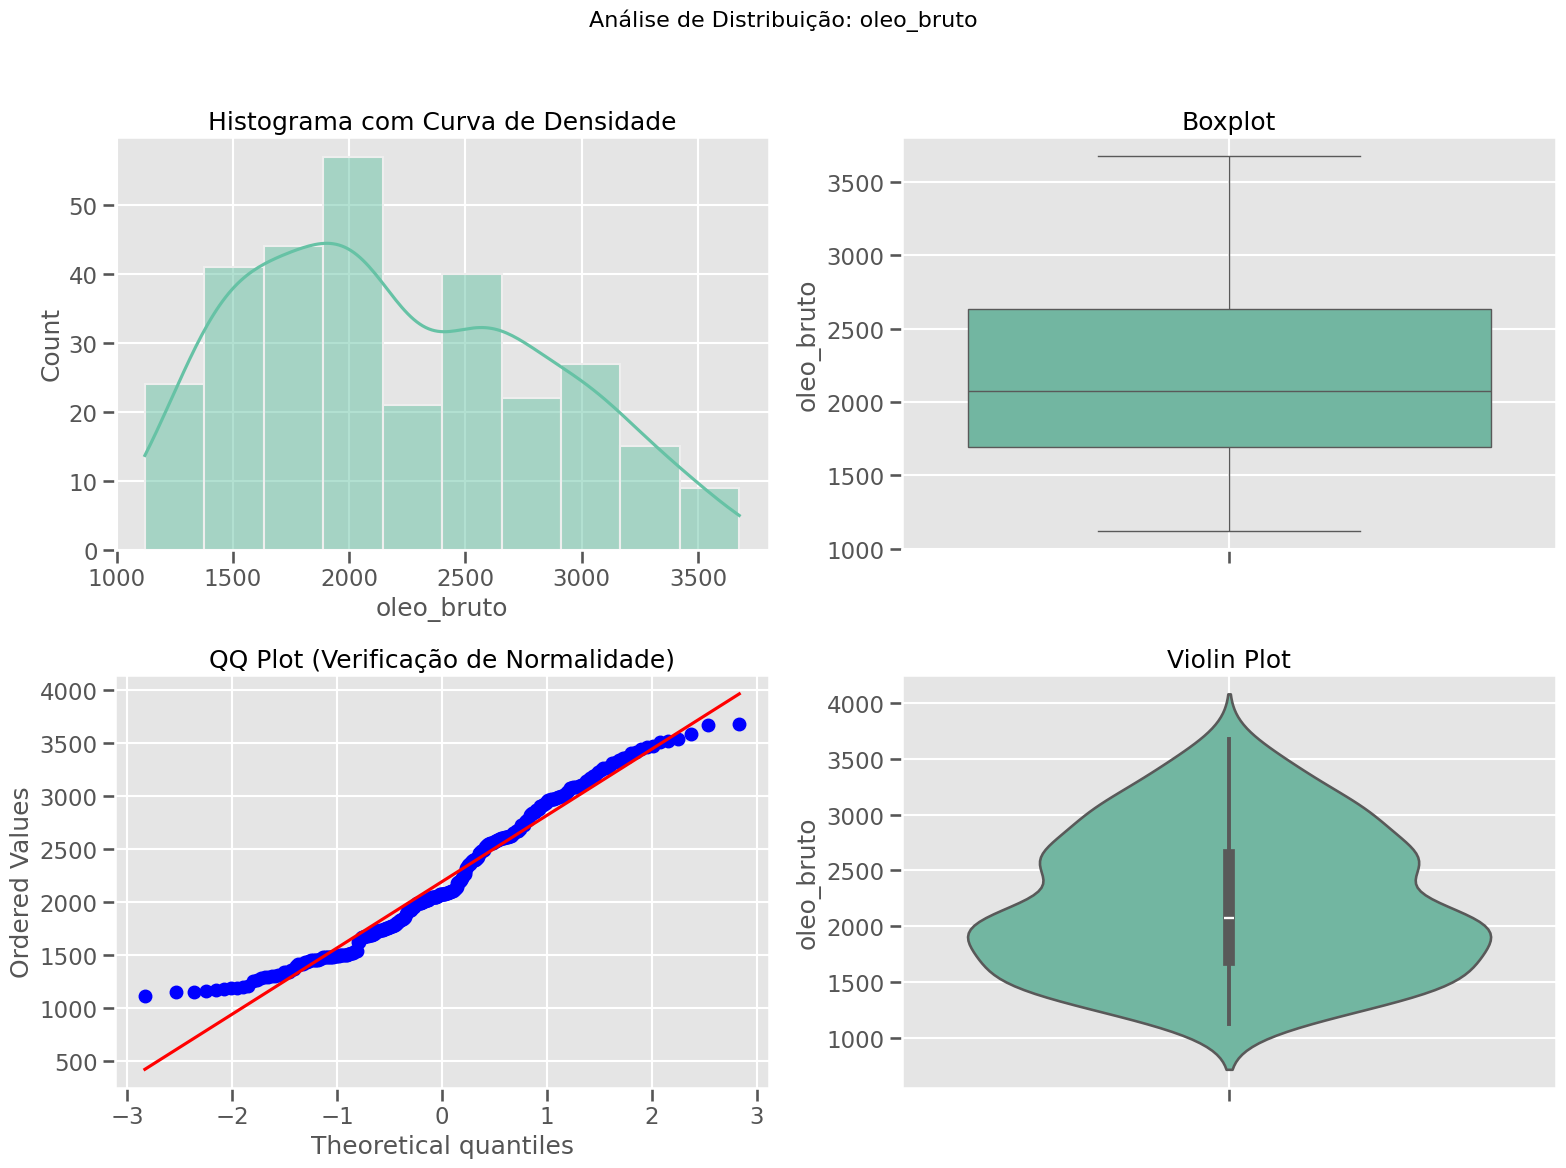


Estatísticas descritivas para oleo_bruto:


,0
Média,2195.160000
Mediana,2077.500000
Desvio Padrão,631.169277
Variância,398374.656589
Mínimo,1121.000000
Máximo,3678.000000
Assimetria,0.343534
Curtose,-0.850090



Teste de Normalidade (Shapiro-Wilk) para oleo_bruto:
Estatística de teste: 0.9636
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: ipca_admin


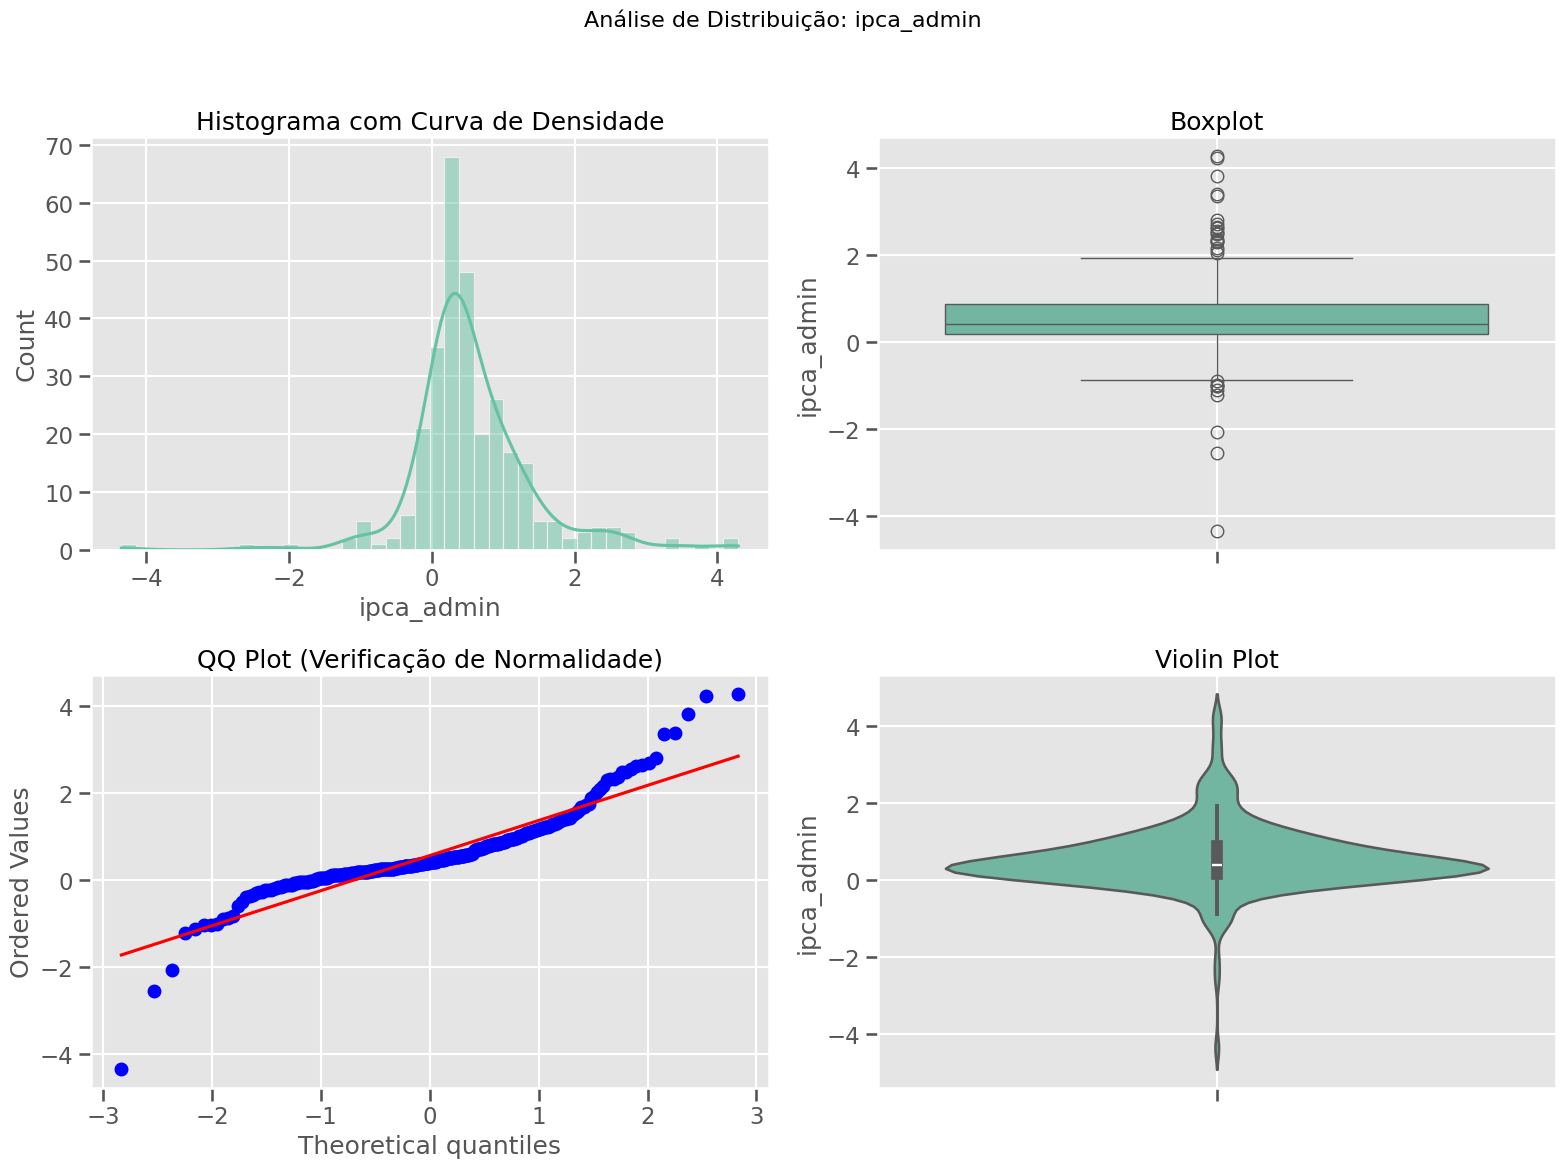


Estatísticas descritivas para ipca_admin:


,0
Média,0.568800
Mediana,0.405000
Desvio Padrão,0.867214
Variância,0.752059
Mínimo,-4.350000
Máximo,4.290000
Assimetria,0.416026
Curtose,6.664785



Teste de Normalidade (Shapiro-Wilk) para ipca_admin:
Estatística de teste: 0.8642
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).


In [8]:
# Loop para criar gráficos de distribuição para cada variável numérica
for column in numeric_columns:
    print(f"\n{'='*80}")
    print(f"Análise de Distribuição para: {column}")
    print(f"{'='*80}")
    plot_variable_distribution(df, column)

### 5. Teste de Estacionariedade

Para a modelagem econométrica adequada de séries temporais, é fundamental verificar se as variáveis são estacionárias. A estacionariedade implica que a média, variância e autocorrelação da série são constantes ao longo do tempo. Utilizaremos o **Teste de Dickey-Fuller Aumentado (ADF)** para avaliar a estacionariedade das variáveis do nosso estudo: `ipca_admin`, `ear` e `oleo_bruto`.

O teste ADF tem como hipótese nula a presença de raiz unitária (série não estacionária). Se o p-valor for menor que o nível de significância (geralmente 0,05), rejeitamos a hipótese nula e concluímos que a série é estacionária.

Vamos implementar o teste ADF para cada uma das variáveis e interpretar os resultados:

In [9]:
# Implementação do Teste de Dickey-Fuller Aumentado (ADF)
from statsmodels.tsa.stattools import adfuller

def test_adf(series, series_name):
    """
    Função para realizar o teste ADF e interpretar os resultados
    """
    print(f"Teste ADF para {series_name}")
    print("-" * 50)
    
    # Executar o teste ADF
    result = adfuller(series.dropna())
    
    # Extrair e apresentar resultados
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Exibir resultados
    print(f'Estatística ADF: {adf_statistic:.4f}')
    print(f'Valor p: {p_value:.4f}')
    print('Valores críticos:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value:.4f}')
    
    # Interpretar resultados
    if p_value < 0.05:
        print(f"Conclusão: Rejeitamos a hipótese nula. ",
              f"A série {series_name} é estacionária (não possui raiz unitária).")
    else:
        print(f"Conclusão: Não rejeitamos a hipótese nula. ",
              f"A série {series_name} não é estacionária (possui raiz unitária).")
    print("\n")

In [10]:
# Aplicar o teste ADF para cada variável
# Certifique-se de que o DataFrame está ordenado por data se for uma série temporal
if 'data' in df.columns:
    df = df.sort_values('data')

# Teste para IPCA Administrados
test_adf(df['ipca_admin'], 'IPCA Administrados')

# Teste para Energia Armazenada (EAR)
test_adf(df['ear'], 'Energia Armazenada (EAR)')

# Teste para Óleo Bruto
test_adf(df['oleo_bruto'], 'Óleo Bruto')

Teste ADF para IPCA Administrados
--------------------------------------------------
Estatística ADF: -11.5632
Valor p: 0.0000
Valores críticos:
	1%: -3.4524
	5%: -2.8713
	10%: -2.5719
Conclusão: Rejeitamos a hipótese nula.  A série IPCA Administrados é estacionária (não possui raiz unitária).


Teste ADF para Energia Armazenada (EAR)
--------------------------------------------------
Estatística ADF: -2.5510
Valor p: 0.1036
Valores críticos:
	1%: -3.4533
	5%: -2.8717
	10%: -2.5722
Conclusão: Não rejeitamos a hipótese nula.  A série Energia Armazenada (EAR) não é estacionária (possui raiz unitária).


Teste ADF para Óleo Bruto
--------------------------------------------------
Estatística ADF: -0.4786
Valor p: 0.8961
Valores críticos:
	1%: -3.4526
	5%: -2.8713
	10%: -2.5720
Conclusão: Não rejeitamos a hipótese nula.  A série Óleo Bruto não é estacionária (possui raiz unitária).




### 5.2 Análise Visual da Estacionariedade: Gráficos de Séries Temporais

Para complementar a análise formal do teste ADF, vamos visualizar graficamente as séries temporais. Isso nos permitirá observar visualmente se as séries apresentam características de não-estacionariedade, como tendências, mudanças de variância ao longo do tempo ou padrões sazonais persistentes.

In [11]:
# Preparando os dados para visualização de séries temporais
# Verificar se o DataFrame tem uma coluna de data para o índice temporal
if 'data' in df.columns:
    # Converter a coluna de data para índice do DataFrame se ainda não for
    time_series_df = df.set_index('data') if not isinstance(df.index, pd.DatetimeIndex) else df.copy()
else:
    # Se não tiver coluna de data, verificar se o índice já é do tipo datetime
    time_series_df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        print("Aviso: Não foi encontrada uma coluna de data para criar série temporal")
        # Criar um índice temporal fictício começando de 01/01/2000 com frequência mensal
        time_series_df.index = pd.date_range(start='2000-01-01', periods=len(df), freq='M')

# Função para plotar séries temporais com análise de estacionariedade
def plot_time_series_stationarity(dataframe, column_name):
    """
    Função para criar gráficos de série temporal com análise de estacionariedade
    - Gráfico da série original
    - Média móvel
    - Desvio padrão móvel
    """
    plt.figure(figsize=(14, 10))
    
    # Criar uma figura com 3 subplots verticalmente empilhados
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    # Plot 1: Série temporal original
    series = dataframe[column_name].dropna()
    ax1.plot(series.index, series.values, label='Série Original')
    ax1.set_title(f'Série Temporal: {column_name}', fontsize=14)
    ax1.set_ylabel('Valor')
    ax1.legend(loc='upper left')
    ax1.grid(True)
    
    # Plot 2: Média Móvel (janela de 12 meses e 24 meses)
    rolling_mean_12 = series.rolling(window=12).mean()
    rolling_mean_24 = series.rolling(window=24).mean()
    ax2.plot(series.index, series.values, label='Série Original', alpha=0.5, color='gray')
    ax2.plot(rolling_mean_12.index, rolling_mean_12.values, label='Média Móvel (12 meses)', color='red')
    ax2.plot(rolling_mean_24.index, rolling_mean_24.values, label='Média Móvel (24 meses)', color='green')
    ax2.set_title(f'Análise de Tendência (Média Móvel): {column_name}', fontsize=14)
    ax2.set_ylabel('Valor')
    ax2.legend(loc='upper left')
    ax2.grid(True)
    
    # Plot 3: Desvio Padrão Móvel (janela de 12 meses)
    rolling_std_12 = series.rolling(window=12).std()
    rolling_std_24 = series.rolling(window=24).std()
    ax3.plot(rolling_std_12.index, rolling_std_12.values, label='Desvio Padrão Móvel (12 meses)', color='purple')
    ax3.plot(rolling_std_24.index, rolling_std_24.values, label='Desvio Padrão Móvel (24 meses)', color='orange')
    ax3.set_title(f'Análise de Variância (Desvio Padrão Móvel): {column_name}', fontsize=14)
    ax3.set_xlabel('Data')
    ax3.set_ylabel('Desvio Padrão')
    ax3.legend(loc='upper left')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Avaliação da estacionariedade com base nos gráficos
    print(f"\nAnálise visual de estacionariedade para {column_name}:")
    print("-" * 70)
    
    # Analisar a presença de tendência (média móvel)
    if rolling_mean_12.max() - rolling_mean_12.min() > 0.1 * series.mean():
        print("Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)")
        print(f"  Variação na média móvel: {rolling_mean_12.max() - rolling_mean_12.min():.4f}")
    else:
        print("Tendência: A série não apresenta tendência significativa (média relativamente constante)")
    
    # Analisar a estabilidade da variância (desvio padrão móvel)
    if rolling_std_12.max() / (rolling_std_12.min() + 1e-10) > 1.5:  # Evita divisão por zero
        print("Variância: A série parece apresentar heterocedasticidade (variância não constante)")
        print(f"  Razão máx/mín do desvio padrão: {rolling_std_12.max() / (rolling_std_12.min() + 1e-10):.4f}")
    else:
        print("Variância: A série parece ter variância relativamente constante (homocedasticidade)")
    
    # Conclusão preliminar
    if (rolling_mean_12.max() - rolling_mean_12.min() > 0.1 * series.mean()) or (rolling_std_12.max() / (rolling_std_12.min() + 1e-10) > 1.5):
        print("\nConclusão preliminar: A série apresenta características de não-estacionariedade")
    else:
        print("\nConclusão preliminar: A série apresenta características de estacionariedade")
    print("-" * 70)


Análise de Série Temporal para: ipca_admin


<Figure size 1400x1000 with 0 Axes>

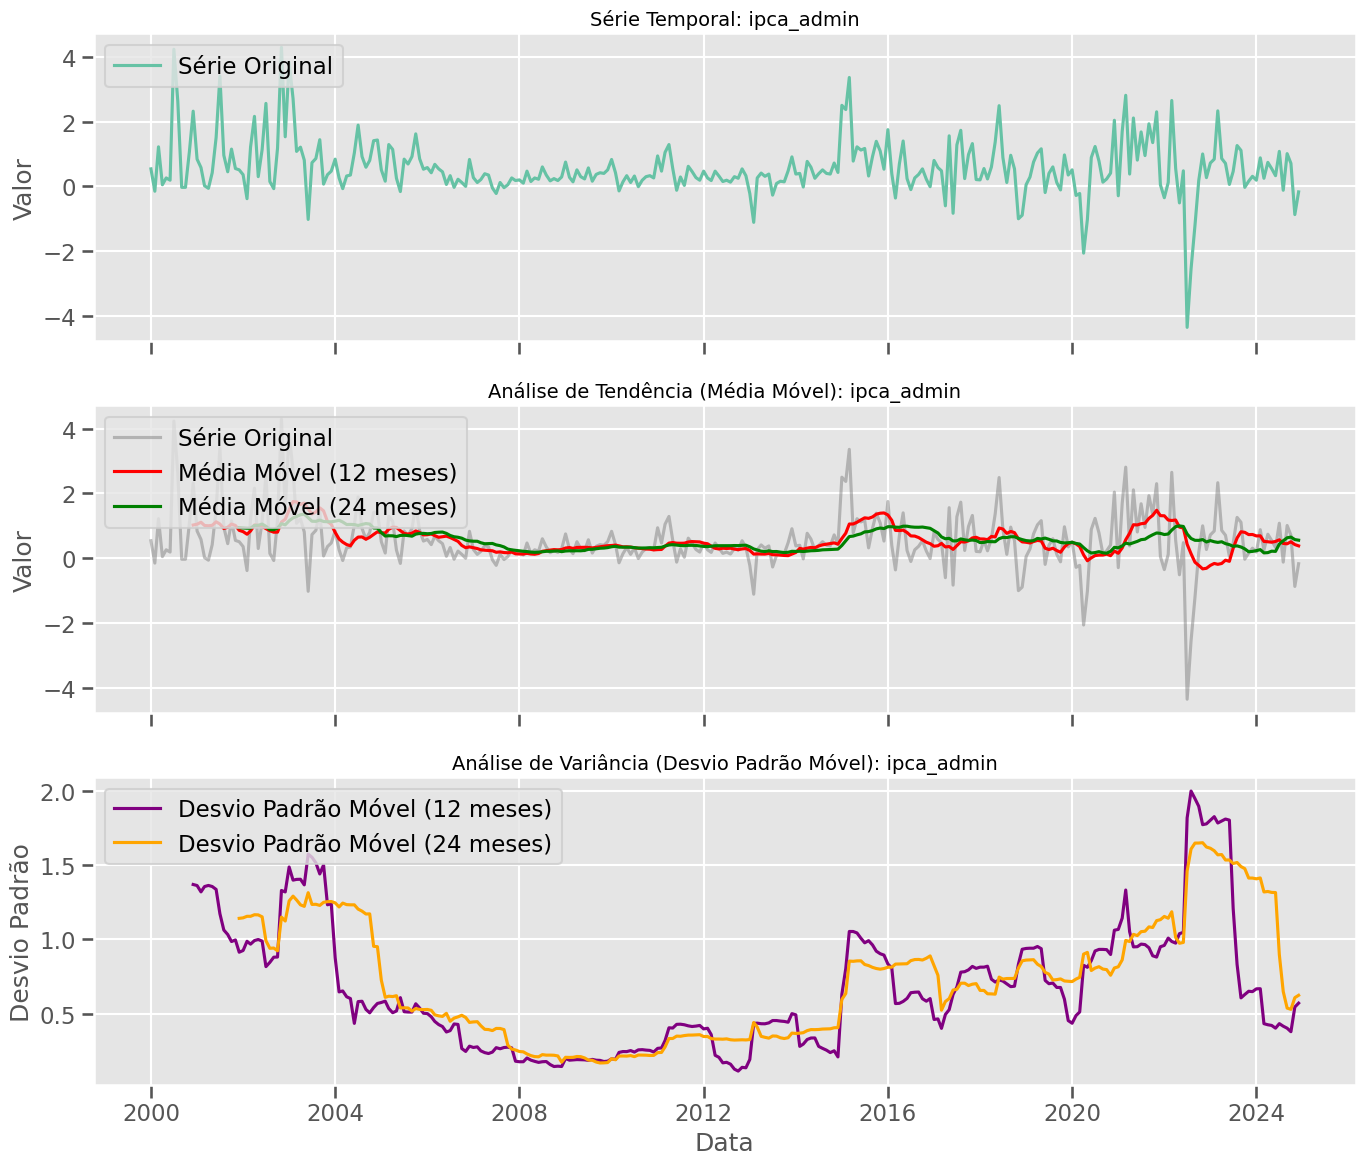


Análise visual de estacionariedade para ipca_admin:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 2.0775
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 17.8208

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------

Análise de Série Temporal para: ear


<Figure size 1400x1000 with 0 Axes>

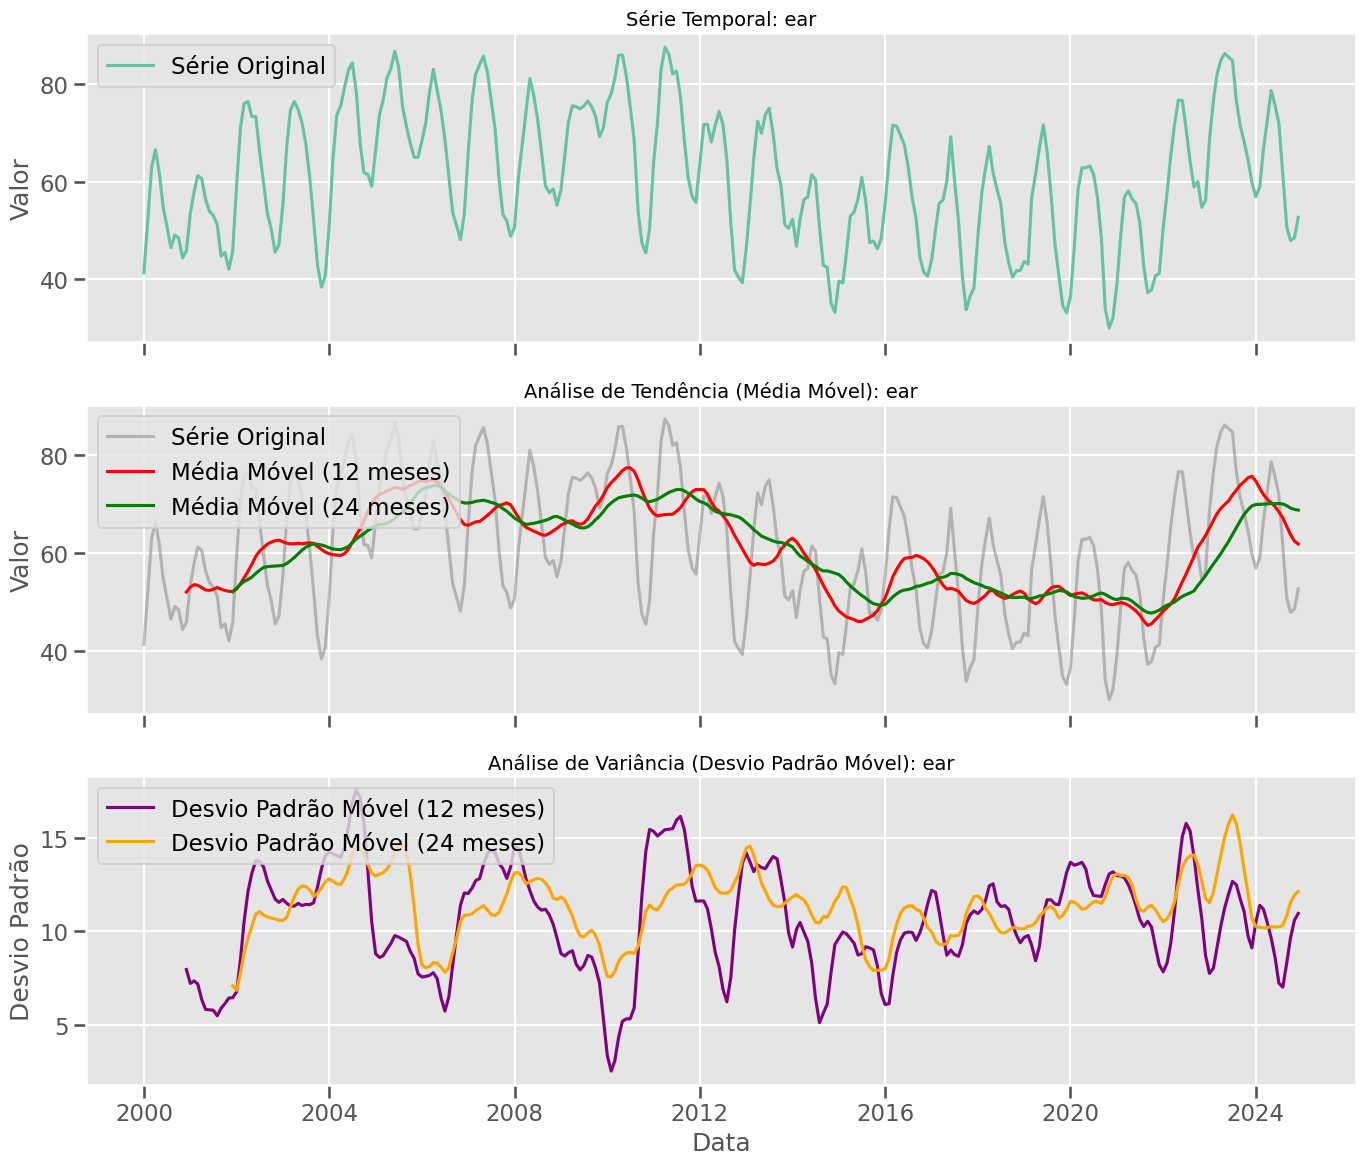


Análise visual de estacionariedade para ear:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 32.2463
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 7.0249

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------

Análise de Série Temporal para: oleo_bruto


<Figure size 1400x1000 with 0 Axes>

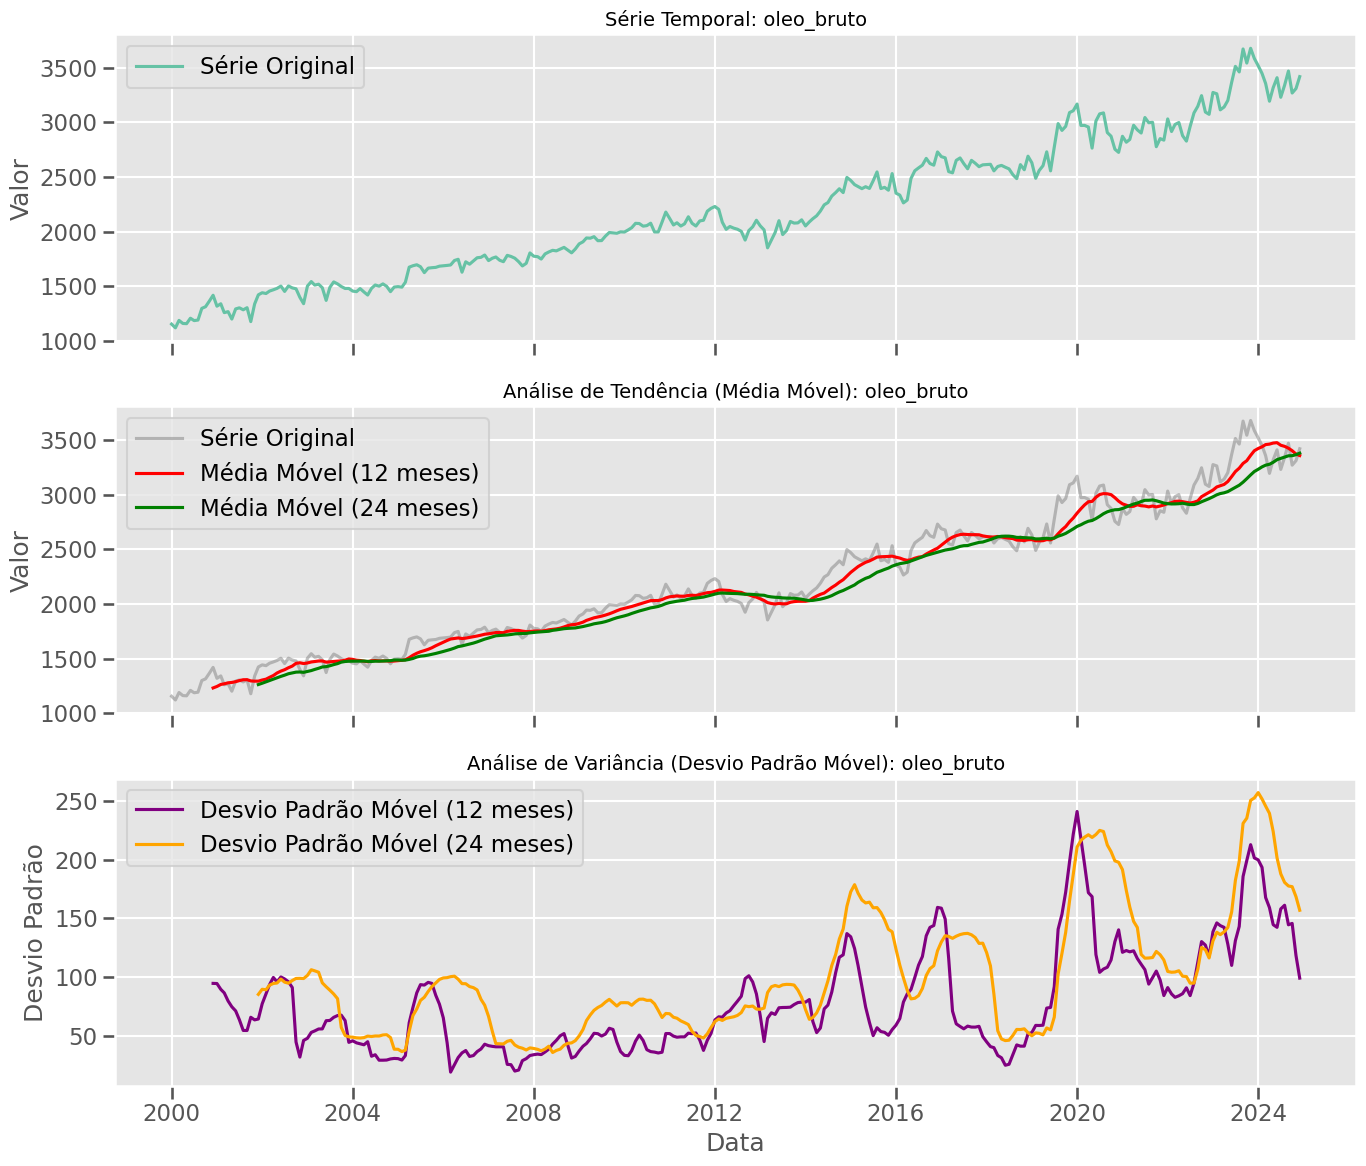


Análise visual de estacionariedade para oleo_bruto:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 2243.8333
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 12.5054

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------


In [12]:
# Aplicar a análise de série temporal para cada variável
variables_to_analyze = ['ipca_admin', 'ear', 'oleo_bruto']

for var in variables_to_analyze:
    print(f"\n{'=' * 80}")
    print(f"Análise de Série Temporal para: {var}")
    print(f"{'=' * 80}")
    plot_time_series_stationarity(time_series_df, var)

## 📉 Testes de Estacionariedade – ADF e Análise Visual

### 🔍 IPCA Administrados (`ipca_admin`)

#### Teste ADF:
- **Estatística ADF**: -11.5632  
- **Valor p**: 0.0000  
- **Valores críticos**:
  - 1%: -3.4524
  - 5%: -2.8713
  - 10%: -2.5719  
- **Conclusão**: Rejeita-se a hipótese nula. A série é **estacionária**.

#### Análise Visual:
- **Tendência aparente**: Sim
- **Variação na média móvel**: 2.0775
- **Heterocedasticidade**: Sim (razão máx/mín do desvio padrão = 17.8208)
- **Conclusão preliminar**: A série **aparenta não ser estacionária** visualmente, mas o teste ADF confirma que é estacionária estatisticamente.

---

### 🔋 Energia Armazenada (`ear`)

#### Teste ADF:
- **Estatística ADF**: -2.5510  
- **Valor p**: 0.1036  
- **Valores críticos**:
  - 1%: -3.4533
  - 5%: -2.8717
  - 10%: -2.5722  
- **Conclusão**: Não se rejeita a hipótese nula. A série **não é estacionária**.

#### Análise Visual:
- **Tendência aparente**: Sim
- **Variação na média móvel**: 32.2463
- **Heterocedasticidade**: Sim (razão máx/mín do desvio padrão = 7.0249)
- **Conclusão preliminar**: A série **não é estacionária**, conforme indicado tanto visual quanto estatisticamente.

---

### 🛢️ Óleo Bruto (`oleo_bruto`)

#### Teste ADF:
- **Estatística ADF**: -0.4786  
- **Valor p**: 0.8961  
- **Valores críticos**:
  - 1%: -3.4526
  - 5%: -2.8713
  - 10%: -2.5720  
- **Conclusão**: Não se rejeita a hipótese nula. A série **não é estacionária**.

#### Análise Visual:
- **Tendência aparente**: Sim
- **Variação na média móvel**: 2243.8333
- **Heterocedasticidade**: Sim (razão máx/mín do desvio padrão = 12.5054)
- **Conclusão preliminar**: A série **não é estacionária**, o que está alinhado com o teste ADF.

---

### ✅ Resumo Final

| Série         | Teste ADF             | Valor-p | Estacionária? | Visualmente estacionária? |
|---------------|------------------------|---------|----------------|-----------------------------|
| `ipca_admin`  | -11.5632               | 0.0000  | ✅ Sim         | ❌ Não                      |
| `ear`         | -2.5510                | 0.1036  | ❌ Não         | ❌ Não                      |
| `oleo_bruto`  | -0.4786                | 0.8961  | ❌ Não         | ❌ Não                      |
